In [16]:
pip install --upgrade tensorflow-gpu --user


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Shivam\AppData\Local\Temp\pip-install-1__6h4ao\tensorflow-gpu_f8da93c5ec9d4c1b868ca2e9b5d2437d\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did no

In [1]:
import tensorflow as tf


In [2]:


import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, MaxPooling2D, Dropout, AveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint



In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir())
base_add = os.path.join('')
base_add

['.ipynb_checkpoints', 'ablation_study.ipynb', 'activation_maps', 'archive(1)', 'archive(1).zip', 'data.xlsx', 'GA+altruism (2).ipynb', 'GA+altruism_shibu.ipynb', 'images', 'model', 'model-ep001-val_loss0.424-val_acc0.842.h5', 'model.h5', 'Paper', 'TSNE.eps', 'WCE-colon.ipynb', 'WCE_Fusion2_extracted_features_192.csv', 'WCE_FusionSAM_extracted_features_192.csv', 'WCE_Hybrid_extracted_features_192.csv']


''

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from tqdm import tqdm
import tensorflow as tf
import keras
import numpy as np
import cv2
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from numpy.random import seed

In [2]:
training_shape = (224,224,3)
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
 

In [45]:
from keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

In [48]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

clahe = cv2.createCLAHE(clipLimit=0.01, tileGridSize=(8,8))    
def claheImage(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gray.astype(np.uint16)
    eq = clahe.apply(gray)
    eq = cv2.cvtColor(eq, cv2.COLOR_GRAY2BGR)
    eq = eq.astype(np.float32)
    return eq


train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   horizontal_flip=True,
                                   & 0/1Heigrue,
                                   rotation_range=0,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1,
                                   fill_mode='constant',
                                   brightness_range=[0.1, 1.0])

validation_datagen= image.ImageDataGenerator(rescale=1./255.)
test_datagen= image.ImageDataGenerator( rescale=1./255.)



In [49]:
train_dir = 'archive(1)/train/images'
val_dir = 'archive(1)/val/images'
test_dir = 'archive(1)/test/images'

In [50]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 16,
    shuffle=True,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')

Found 3201 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [51]:
train_generator.class_indices

{'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}

In [52]:
from tensorflow.keras import regularizers
from keras.regularizers import l2

base_model = ResNet50V2(include_top=False,weights='imagenet',input_shape = training_shape)

for layer in base_model.layers:
    layer.trainable = False
    
model = Sequential()
model.add(base_model)
#model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(GaussianNoise(0.35))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.35))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
gaussian_noise (GaussianNois (None, 7, 7, 2048)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [53]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [174]:
n_classes = 4
model = base_model.output
model = Flatten()(model)
model = Dense(128)(model)
model = Dropout(0.5)(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
output = Dense(n_classes, activation='softmax')(model)
model = Model(inputs=base_model.input, outputs=output)

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
gaussian_noise (GaussianNois (None, 7, 7, 2048)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [55]:
def mod_checkpoint_callback() -> None:
    """
    Saving our model
    
    Returns:
        None: Saving a checkpoint of the model.
    """
    trained_model = ModelCheckpoint(filepath = 'model.h5',  # result file name
                             save_weights_only = False,     # Save all training results/params.
                             monitor = 'val_accuracy',      # check our model accuracy if it's step forward.
                             mode = 'auto',                 # enable auto save.
                             save_best_only = True,         # if ac_new > ac_old
                             verbose = 1)
    return trained_model

In [56]:
n_epoch = 25


early_stop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, 
                           mode='auto', restore_best_weights=True)

model_checkpoint_callback = mod_checkpoint_callback()

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [57]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [58]:
history = model.fit(train_generator,
                    epochs=20,
                    callbacks=[reduce_lr,early_stop ,model_checkpoint_callback],
                    validation_data=(validation_generator)
                   )

Epoch 1/20
201/201 [==============================] - 63s 302ms/step - loss: 0.3117 - accuracy: 0.8966 - val_loss: 0.2709 - val_accuracy: 0.9085

Epoch 00001: val_accuracy improved from -inf to 0.90850, saving model to model.h5


C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
201/201 [==============================] - 59s 296ms/step - loss: 0.1848 - accuracy: 0.9363 - val_loss: 0.1704 - val_accuracy: 0.9355

Epoch 00002: val_accuracy improved from 0.90850 to 0.93550, saving model to model.h5
Epoch 3/20
201/201 [==============================] - 60s 297ms/step - loss: 0.1619 - accuracy: 0.9450 - val_loss: 0.1369 - val_accuracy: 0.9460

Epoch 00003: val_accuracy improved from 0.93550 to 0.94600, saving model to model.h5
Epoch 4/20
201/201 [==============================] - 61s 304ms/step - loss: 0.1290 - accuracy: 0.9522 - val_loss: 0.1151 - val_accuracy: 0.9630

Epoch 00004: val_accuracy improved from 0.94600 to 0.96300, saving model to model.h5
Epoch 5/20
201/201 [==============================] - 58s 291ms/step - loss: 0.1307 - accuracy: 0.9578 - val_loss: 0.1409 - val_accuracy: 0.9490

Epoch 00005: val_accuracy did not improve from 0.96300
Epoch 6/20
201/201 [==============================] - 58s 287ms/step - loss: 0.1351 - accuracy: 0.9560 - v

KeyboardInterrupt: 

In [59]:


model.evaluate(test_generator)



50/50 [==============================] - 6s 116ms/step - loss: 0.1229 - accuracy: 0.9563


[0.12293805927038193, 0.956250011920929]

## Testing using dataframe

In [43]:
 #Generate data paths with labels
def define_paths(dir):
    filepaths = []
    labels = []

    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        flist = os.listdir(foldpath)
        
        for f in flist:
            f_path = os.path.join(foldpath, f)
            filelist = os.listdir(f_path)
            
            for file in filelist:
                fpath = os.path.join(f_path, file)
                #filepaths.append(fpath)

                if f == '0_normal':
                    filepaths.append(fpath)
                    labels.append('Normal')

                elif f == '1_ulcerative_colitis':
                    filepaths.append(fpath)
                    labels.append('Ulcerative Colitis')

                elif f == '2_polyps':
                    filepaths.append(fpath)
                    labels.append('Polyps')
                    
                elif f == '3_esophagitis':
                    filepaths.append(fpath)
                    labels.append('Esophagitis')

        
    return filepaths, labels


# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)

In [44]:
base_add = os.path.join('archive(1)')
base_add

'archive(1)'

In [45]:
train_dir =  os.path.join('archive(1)', 'train')
val_dir =  os.path.join('archive(1)', 'val')
test_dir =  os.path.join('archive(1)', 'test')

In [46]:
files,classes = define_paths(train_dir)
classes

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',

In [47]:
train_df = define_df(files,classes)
train_df

filepaths       labels
0     archive(1)\train\images\0_normal\train_normal_...       Normal
1     archive(1)\train\images\0_normal\train_normal_...       Normal
2     archive(1)\train\images\0_normal\train_normal_...       Normal
3     archive(1)\train\images\0_normal\train_normal_...       Normal
4     archive(1)\train\images\0_normal\train_normal_...       Normal
...                                                 ...          ...
3196  archive(1)\train\images\3_esophagitis\train_es...  Esophagitis
3197  archive(1)\train\images\3_esophagitis\train_es...  Esophagitis
3198  archive(1)\train\images\3_esophagitis\train_es...  Esophagitis
3199  archive(1)\train\images\3_esophagitis\train_es...  Esophagitis
3200  archive(1)\train\images\3_esophagitis\train_es...  Esophagitis

[3201 rows x 2 columns]

In [48]:
train_df['label_code'] = pd.Categorical(train_df['labels']).codes
train_df

filepaths       labels  \
0     archive(1)\train\images\0_normal\train_normal_...       Normal   
1     archive(1)\train\images\0_normal\train_normal_...       Normal   
2     archive(1)\train\images\0_normal\train_normal_...       Normal   
3     archive(1)\train\images\0_normal\train_normal_...       Normal   
4     archive(1)\train\images\0_normal\train_normal_...       Normal   
...                                                 ...          ...   
3196  archive(1)\train\images\3_esophagitis\train_es...  Esophagitis   
3197  archive(1)\train\images\3_esophagitis\train_es...  Esophagitis   
3198  archive(1)\train\images\3_esophagitis\train_es...  Esophagitis   
3199  archive(1)\train\images\3_esophagitis\train_es...  Esophagitis   
3200  archive(1)\train\images\3_esophagitis\train_es...  Esophagitis   

      label_code  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
3196           0  
3197           0  
3198           0  
3199           0  
3200           0  

[3201 rows x 3 columns]

In [49]:
train_df = train_df.sample(frac = 1)
train_df

filepaths              labels  \
1150  archive(1)\train\images\1_ulcerative_colitis\t...  Ulcerative Colitis   
603   archive(1)\train\images\0_normal\train_normal_...              Normal   
3048  archive(1)\train\images\3_esophagitis\train_es...         Esophagitis   
1454  archive(1)\train\images\1_ulcerative_colitis\t...  Ulcerative Colitis   
2237  archive(1)\train\images\2_polyps\train_polyps_...              Polyps   
...                                                 ...                 ...   
211   archive(1)\train\images\0_normal\train_normal_...              Normal   
294   archive(1)\train\images\0_normal\train_normal_...              Normal   
141   archive(1)\train\images\0_normal\train_normal_...              Normal   
1626  archive(1)\train\images\2_polyps\train_polyps_...              Polyps   
167   archive(1)\train\images\0_normal\train_normal_...              Normal   

      label_code  
1150           3  
603            1  
3048           0  
1454           3  
2237           2  
...          ...  
211            1  
294            1  
141            1  
1626           2  
167            1  

[3201 rows x 3 columns]

In [27]:
train_df.to_csv('train_df.csv')

PermissionError: [Errno 13] Permission denied: 'train_df.csv'

In [50]:
files,classes = define_paths(val_dir)
classes

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',

In [51]:
val_df = define_df(files,classes)
val_df

filepaths       labels
0     archive(1)\val\images\0_normal\val_normal_ (1)...       Normal
1     archive(1)\val\images\0_normal\val_normal_ (10...       Normal
2     archive(1)\val\images\0_normal\val_normal_ (10...       Normal
3     archive(1)\val\images\0_normal\val_normal_ (10...       Normal
4     archive(1)\val\images\0_normal\val_normal_ (10...       Normal
...                                                 ...          ...
1995  archive(1)\val\images\3_esophagitis\val_esopha...  Esophagitis
1996  archive(1)\val\images\3_esophagitis\val_esopha...  Esophagitis
1997  archive(1)\val\images\3_esophagitis\val_esopha...  Esophagitis
1998  archive(1)\val\images\3_esophagitis\val_esopha...  Esophagitis
1999  archive(1)\val\images\3_esophagitis\val_esopha...  Esophagitis

[2000 rows x 2 columns]

In [52]:
val_df['label_code'] = pd.Categorical(val_df['labels']).codes

In [53]:
val_df = val_df.sample(frac = 1)
val_df

filepaths              labels  \
1090  archive(1)\val\images\2_polyps\val_polyps_ (18...              Polyps   
1014  archive(1)\val\images\2_polyps\val_polyps_ (11...              Polyps   
1316  archive(1)\val\images\2_polyps\val_polyps_ (38...              Polyps   
1503  archive(1)\val\images\3_esophagitis\val_esopha...         Esophagitis   
1157  archive(1)\val\images\2_polyps\val_polyps_ (24...              Polyps   
...                                                 ...                 ...   
1452  archive(1)\val\images\2_polyps\val_polyps_ (56...              Polyps   
29    archive(1)\val\images\0_normal\val_normal_ (12...              Normal   
551   archive(1)\val\images\1_ulcerative_colitis\val...  Ulcerative Colitis   
1350  archive(1)\val\images\2_polyps\val_polyps_ (41...              Polyps   
700   archive(1)\val\images\1_ulcerative_colitis\val...  Ulcerative Colitis   

      label_code  
1090           2  
1014           2  
1316           2  
1503           0  
1157           2  
...          ...  
1452           2  
29             1  
551            3  
1350           2  
700            3  

[2000 rows x 3 columns]

In [54]:
files,classes = define_paths(test_dir)
classes

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',

In [55]:
test_df = define_df(files,classes)
test_df

filepaths       labels
0    archive(1)\test\images\0_normal\test_normal_ (...       Normal
1    archive(1)\test\images\0_normal\test_normal_ (...       Normal
2    archive(1)\test\images\0_normal\test_normal_ (...       Normal
3    archive(1)\test\images\0_normal\test_normal_ (...       Normal
4    archive(1)\test\images\0_normal\test_normal_ (...       Normal
..                                                 ...          ...
795  archive(1)\test\images\3_esophagitis\test_esop...  Esophagitis
796  archive(1)\test\images\3_esophagitis\test_esop...  Esophagitis
797  archive(1)\test\images\3_esophagitis\test_esop...  Esophagitis
798  archive(1)\test\images\3_esophagitis\test_esop...  Esophagitis
799  archive(1)\test\images\3_esophagitis\test_esop...  Esophagitis

[800 rows x 2 columns]

In [56]:
test_df['label_code'] = pd.Categorical(test_df['labels']).codes

In [57]:
test_df = test_df.sample(frac = 1)
test_df

filepaths              labels  \
425  archive(1)\test\images\2_polyps\test_polyps_ (...              Polyps   
52   archive(1)\test\images\0_normal\test_normal_ (...              Normal   
599  archive(1)\test\images\2_polyps\test_polyps_ (...              Polyps   
433  archive(1)\test\images\2_polyps\test_polyps_ (...              Polyps   
116  archive(1)\test\images\0_normal\test_normal_ (...              Normal   
..                                                 ...                 ...   
725  archive(1)\test\images\3_esophagitis\test_esop...         Esophagitis   
314  archive(1)\test\images\1_ulcerative_colitis\te...  Ulcerative Colitis   
513  archive(1)\test\images\2_polyps\test_polyps_ (...              Polyps   
25   archive(1)\test\images\0_normal\test_normal_ (...              Normal   
503  archive(1)\test\images\2_polyps\test_polyps_ (...              Polyps   

     label_code  
425           2  
52            1  
599           2  
433           2  
116           1  
..          ...  
725           0  
314           3  
513           2  
25            1  
503           2  

[800 rows x 3 columns]

In [62]:
import tqdm

In [128]:
IMAGE_SIZE = 224
def read_img(img_path):
  img = cv2.imread(img_path,cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
  img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  img = (255*img).astype(np.uint8)
  return img
train_img = []
for img_name in tqdm(train_df['filepaths'].values):
  train_img.append(read_img(img_name))

100%|██████████████████████████████████████████████████████████████████████████████| 3201/3201 [00:40<00:00, 80.00it/s]


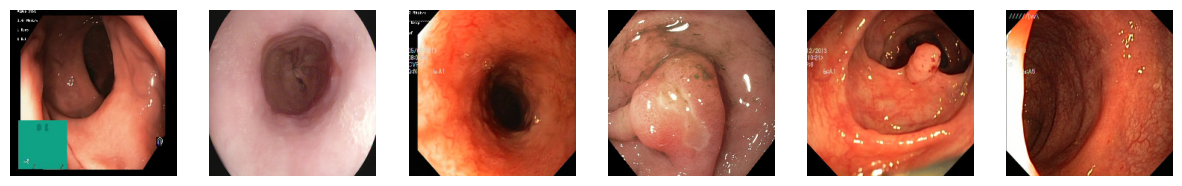

In [129]:
plt.figure(figsize=(15,12))
for i in range(1,7,1):
    plt.subplot(1,6,i)
    plt.imshow(train_img[i])
    plt.axis('off')
plt.show()

In [156]:
IMAGE_SIZE = 224
def read_img(img_path):

    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    #configure CLAHE
    clahe = cv2.createCLAHE(clipLimit=10,tileGridSize=(8,8))

    #0 to 'L' channel, 1 to 'a' channel, and 2 to 'b' channel
    img[:,:,0] = clahe.apply(img[:,:,0])

    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    return img
                  
train_img = []
for img_name in tqdm(train_df['filepaths'].values):
  train_img.append(read_img(img_name))

100%|██████████████████████████████████████████████████████████████████████████████| 3201/3201 [01:04<00:00, 49.88it/s]


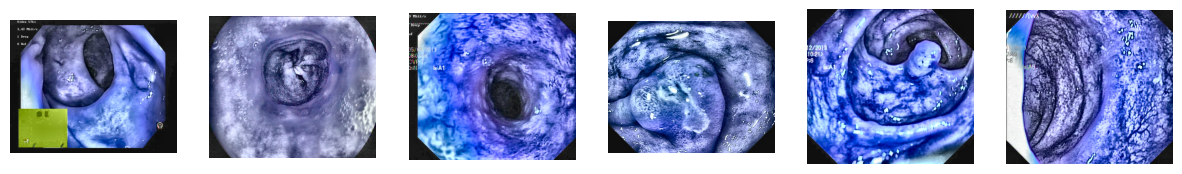

In [157]:
plt.figure(figsize=(15,12))
for i in range(1,7,1):
    plt.subplot(1,6,i)
    plt.imshow(train_img[i])
    plt.axis('off')
plt.show()

In [160]:
train_img[3200]

array([[[24, 24, 24],
        [24, 24, 24],
        [24, 24, 24],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[24, 24, 24],
        [24, 24, 24],
        [24, 24, 24],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[24, 24, 24],
        [24, 24, 24],
        [24, 24, 24],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       ...,

       [[63, 72, 38],
        [74, 85, 36],
        [73, 90, 12],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]],

       [[65, 70, 44],
        [73, 83, 45],
        [72, 83, 26],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]],

       [[10, 18,  0],
        [20, 24,  0],
        [22, 27,  0],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]]], dtype=uint8)

In [161]:
x_train = np.array(train_img)/255
print(x_train.shape)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_7632\1589329256.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array(train_img)/255


(3201,)


In [132]:
y_train = np.array(train_df['label_code'])

In [133]:
IMAGE_SIZE = 224
def read_img(img_path):
  img = cv2.imread(img_path,cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
  return img
train_img = []
for img_name in tqdm(val_df['filepaths'].values):
  train_img.append(read_img(img_name))

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:29<00:00, 67.20it/s]


In [134]:
x_val = np.array(train_img,np.float32)/255
print(x_val.shape)

(2000, 224, 224, 3)


In [135]:
y_val = np.array(val_df['label_code'])

In [136]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 4)
y_val = to_categorical(y_val , num_classes=4)

In [137]:
IMAGE_SIZE = 224
def read_img(img_path):
  img = cv2.imread(img_path,cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))

  return img
train_img = []
for img_name in tqdm(test_df['filepaths'].values):
  train_img.append(read_img(img_name))

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [00:11<00:00, 69.17it/s]


In [138]:
x_test = np.array(train_img,np.float32)/255
print(x_test.shape)

(800, 224, 224, 3)


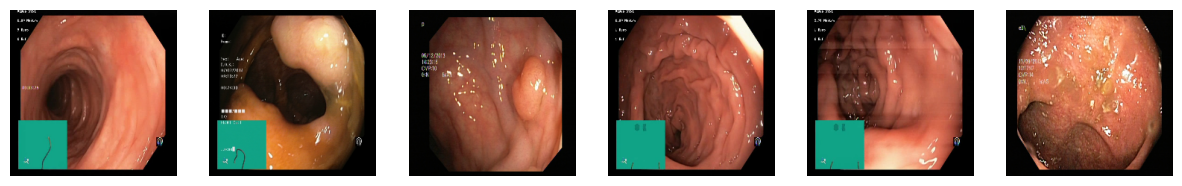

In [139]:
plt.figure(figsize=(15,12))
for i in range(1,7,1):
    plt.subplot(1,6,i)
    plt.imshow(train_img[i])
    plt.axis('off')
plt.show()

In [140]:
y_test = np.array(test_df['label_code'])

In [298]:
training_shape = (224,224,3)
base_model = MobileNet(include_top=False,weights='imagenet',input_shape = training_shape)
for layer in base_model.layers:
    layer.trainable = True 

In [299]:
n_classes = 4
model = base_model.output
model = Flatten()(model)
model = Dense(128)(model)
model = Dropout(0.5)(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
output = Dense(n_classes, activation='softmax')(model)
model = Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0  

In [144]:
# Compiling the model
optimizer = Adam(lr=0.001)
model.compile(loss = 'categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy','Precision','Recall','AUC'])

C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [145]:
x_train.shape

(3201, 224, 224, 3)

In [146]:
y_train.shape

(3201, 4)

In [147]:
history = model.fit(x_train,y_train,
                    epochs=20,
                    callbacks=[reduce_lr,early_stop ,model_checkpoint_callback],
                    validation_data=(x_val,y_val) 
                   )

Epoch 1/20
101/101 [==============================] - 19s 149ms/step - loss: 0.1183 - accuracy: 0.9691 - precision: 0.9777 - recall: 0.9597 - auc: 0.9976 - val_loss: 0.2115 - val_accuracy: 0.9225 - val_precision: 0.9241 - val_recall: 0.9190 - val_auc: 0.9917

Epoch 00001: val_accuracy did not improve from 0.93700
Epoch 2/20
101/101 [==============================] - 14s 135ms/step - loss: 0.0202 - accuracy: 0.9959 - precision: 0.9972 - recall: 0.9956 - auc: 1.0000 - val_loss: 1.1290 - val_accuracy: 0.7525 - val_precision: 0.7562 - val_recall: 0.7445 - val_auc: 0.8830

Epoch 00002: val_accuracy did not improve from 0.93700
Epoch 3/20
101/101 [==============================] - 14s 135ms/step - loss: 0.0229 - accuracy: 0.9944 - precision: 0.9950 - recall: 0.9941 - auc: 0.9997 - val_loss: 0.2195 - val_accuracy: 0.9040 - val_precision: 0.9068 - val_recall: 0.9005 - val_auc: 0.9909

Epoch 00003: val_accuracy did not improve from 0.93700
Epoch 4/20
 35/101 [=========>....................] - E

KeyboardInterrupt: 

In [115]:
preds = model.predict(x_test)

In [116]:
lst = []
for a in preds:
    lst.append(np.argmax(a))
accuracy_score(lst,y_test)

0.585

In [117]:
classes_= ['Normal', 'Ulcerative Colitis','Polyps','Esophagitis']

In [455]:
classes_= ['Ulcerative Colitis','Polyps']

In [118]:
report=classification_report(y_test,lst,target_names=classes_)
print(report)

                    precision    recall  f1-score   support

            Normal       1.00      0.36      0.53       200
Ulcerative Colitis       1.00      0.98      0.99       200
            Polyps       0.38      1.00      0.55       200
       Esophagitis       0.00      0.00      0.00       200

          accuracy                           0.58       800
         macro avg       0.59      0.58      0.52       800
      weighted avg       0.59      0.58      0.52       800



C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
confusion_matrix(y_test,lst)

array([[ 72,   0, 128,   0],
       [  0, 196,   4,   0],
       [  0,   0, 200,   0],
       [  0,   0, 200,   0]], dtype=int64)

(800, 224, 224, 3)


C:\Users\Shivam\AppData\Local\Temp\ipykernel_7632\2131351685.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[colors.astype(np.int)])
C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be 

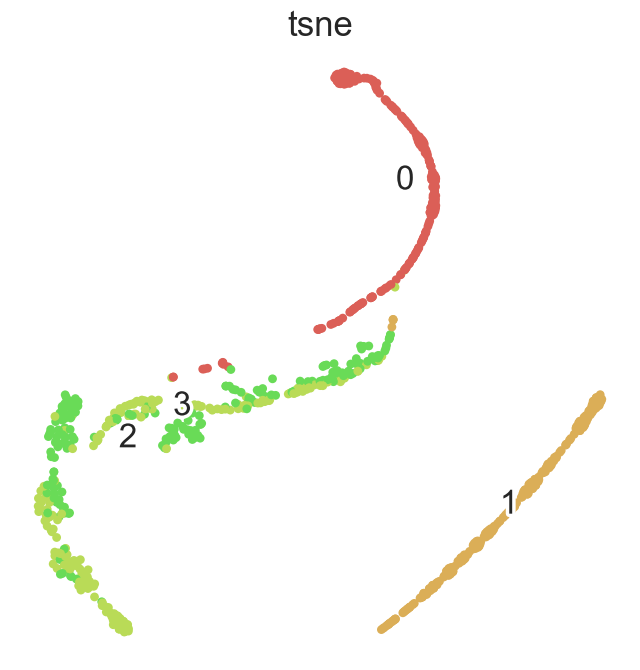

In [120]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold._t_sne import (_joint_probabilities,
                                    _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
#







print(x_test.shape) 

pred_batch = model(x_test)  

proj = TSNE(random_state=RS).fit_transform(pred_batch)










def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts



scatter(proj,y_test)
plt.title('tsne',fontsize = 25)
plt.savefig('TSNE.eps', dpi=60)


In [121]:
def visualize_class_activation_map(model, img_path, output_path, thr=0.0):
  original_img = cv2.imread(img_path, 1)
  original_img = cv2.resize(original_img, (224, 224))
  width, height, _ = original_img.shape

  img = tf.expand_dims(original_img,axis=0)

  try:
    [conv_outputs] = model([img])[0]
  except:
    conv_outputs = (model.get_layer('conv_pw_13_relu').output)
    get_output = K.function([model.layers[0].input], [conv_outputs])
    [conv_outputs] = get_output([img])
    conv_outputs = conv_outputs[0, :, :, :]

  #Create the class activation map.
  cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[0:2])
  
  for i in range(conv_outputs.shape[2]):
    cam += 1.0 * conv_outputs[:, :, i]

  cam /= np.max(cam)
  try:
    cam = cam.numpy()
  except:
    pass
  cam = cv2.resize(cam, (height, width))
  heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
  heatmap[np.where(cam < thr)] = 0
  cam_img = heatmap*0.5 + original_img

  cam_img = cv2.resize(cam_img, (224, 224))
  cv2.imwrite(output_path, cam_img)

  plt.figure(figsize=(8, 8))
  im = Image.open(img_path)
  im.resize((224, 224))
  plt.imshow(np.array(im))
  plt.show()


  plt.figure(figsize=(8, 8))
  im = Image.open(output_path)
  im.resize((224, 224))
  plt.imshow(np.array(im))
  plt.show()
  return cam

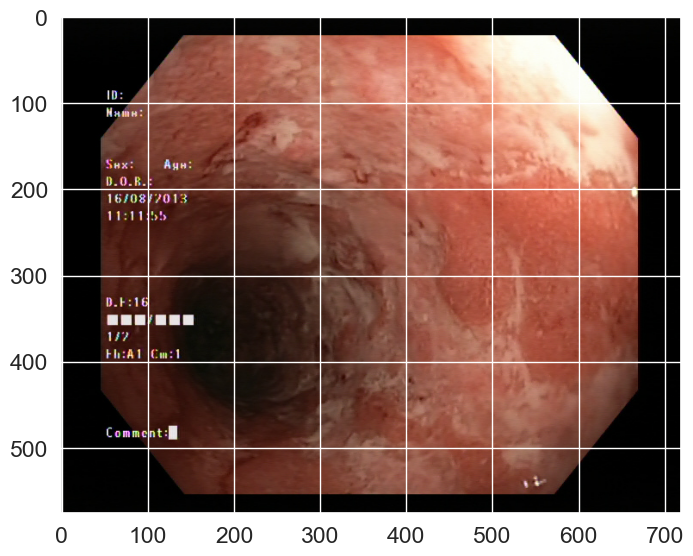

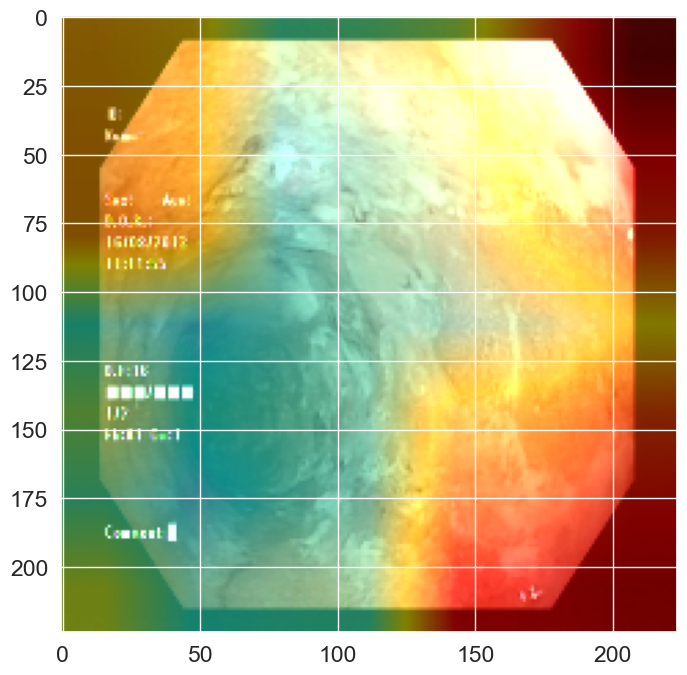

In [127]:
visualize_class_activation_map(model, './archive(1)/test/images/1_ulcerative_colitis/test_ulcer_ (30).jpg', './activation_maps/pic_cam.png',thr=-10);

## Using kaggle notebook

In [49]:


train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [50]:
train_dir = 'archive(1)/train/images'
val_dir = 'archive(1)/val/images'
test_dir = 'archive(1)/test/images'

In [51]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                           shuffle=False)


val_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3201 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [39]:
IMAGE_SIZE = [224, 224, 3]

In [54]:
base_model_resnet152 = tf.keras.applications.resnet.ResNet152(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

In [40]:
base_model_mobilenetV2 = tf.keras.applications.MobileNet(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

In [55]:
for layer in base_model_resnet152.layers:
    layer.trainable = False

In [56]:
x = base_model_resnet152.output
x = Flatten()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

prediction = Dense(4, activation='softmax')(x)
final_model = Model(inputs=base_model_resnet152.input, outputs=prediction)

In [57]:
final_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [58]:
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [59]:
history = final_model.fit(
  training_set,
  validation_data=val_set,
  epochs=20
)

Epoch 1/20
101/101 [==============================] - 40s 324ms/step - loss: 1.4125 - accuracy: 0.5701 - val_loss: 1.1380 - val_accuracy: 0.6112
Epoch 2/20
101/101 [==============================] - 33s 325ms/step - loss: 0.6426 - accuracy: 0.7220 - val_loss: 0.9745 - val_accuracy: 0.6037
Epoch 3/20
101/101 [==============================] - 34s 333ms/step - loss: 0.5474 - accuracy: 0.7669 - val_loss: 1.0907 - val_accuracy: 0.5838
Epoch 4/20
101/101 [==============================] - 35s 341ms/step - loss: 0.4821 - accuracy: 0.7982 - val_loss: 1.1157 - val_accuracy: 0.5913
Epoch 5/20
101/101 [==============================] - 34s 340ms/step - loss: 0.4464 - accuracy: 0.8072 - val_loss: 0.9924 - val_accuracy: 0.6175
Epoch 6/20
101/101 [==============================] - ETA: 0s - loss: 0.4277 - accuracy: 0.8219

KeyboardInterrupt: 

In [20]:
print("Evaluating on test data ....")
results = final_model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
63/63 [==============================] - 26s 418ms/step - loss: 3.0766 - accuracy: 0.2500
test loss, test acc: [3.076626777648926, 0.25]


In [21]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [43]:
from keras import backend as K

In [44]:
def visualize_class_activation_map(model, img_path, output_path, thr=0.0):
  original_img = cv2.imread(img_path, 1)
  original_img = cv2.resize(original_img, (224, 224))
  width, height, _ = original_img.shape

  img = tf.expand_dims(original_img,axis=0)

  try:
    [conv_outputs] = model([img])[0]
  except:
    conv_outputs = (model.get_layer('conv5_block3_out').output)
    get_output = K.function([model.layers[0].input], [conv_outputs])
    [conv_outputs] = get_output([img])
    conv_outputs = conv_outputs[0, :, :, :]

  #Create the class activation map.
  cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[0:2])
  
  for i in range(conv_outputs.shape[2]):
    cam += 1.0 * conv_outputs[:, :, i]

  cam /= np.max(cam)
  try:
    cam = cam.numpy()
  except:
    pass
  cam = cv2.resize(cam, (height, width))
  heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
  heatmap[np.where(cam < thr)] = 0
  cam_img = heatmap*0.5 + original_img

  cam_img = cv2.resize(cam_img, (224, 224))
  cv2.imwrite(output_path, cam_img)

  plt.figure(figsize=(8, 8))
  im = Image.open(img_path)
  im.resize((224, 224))
  plt.imshow(np.array(im))
  plt.show()


  plt.figure(figsize=(8, 8))
  im = Image.open(output_path)
  im.resize((224, 224))
  plt.imshow(np.array(im))
  plt.show()
  return cam

In [46]:
visualize_class_activation_map(loaded_model, './archive(1)/test/images/2_polyps/test_polyps_ (36).jpg', './activation_maps/pic_cam.png',thr=-10);

ValueError: No such layer: conv5_block3_out.

In [60]:
from sklearn.manifold import TSNE

In [61]:
x_all = None;
y_all = None;

for i in range(50):
  # x_example_batch, y_example_batch = (next(train_generator))
  x_example_batch, y_example_batch = (next(test_set))
  if not x_all is None:
    x_all = np.concatenate([x_all,x_example_batch],axis=0) 
    y_all = np.concatenate([y_all,y_example_batch],axis=0)  
  else:
    x_all = x_example_batch
    y_all = y_example_batch

In [62]:
pred_batch = final_model(x_all)

ResourceExhaustedError: OOM when allocating tensor with shape[1584,64,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D]

In [ ]:
proj = TSNE(random_state=1000).fit_transform(pred_batch)

In [ ]:
import matplotlib.patheffects as PathEffects

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
y_all_1d = np.argmax(y_all,axis=1);

In [ ]:
scatter(proj,y_all_1d)
plt.title("tsne",fontsize = 25)
# plt.savefig('images/c110.eps', dpi=60)

In [222]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold._t_sne import (_joint_probabilities,
                                    _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
#







print(x_test.shape) 

pred_batch = model(x_test)  

proj = TSNE(random_state=RS).fit_transform(pred_batch)










def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts



scatter(proj,y_test)
plt.title('tsne',fontsize = 25)
plt.savefig('TSNE.eps', dpi=60)

(800, 224, 224, 3)


ResourceExhaustedError: OOM when allocating tensor with shape[800,112,112,96] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:FusedBatchNormV3]

In [38]:
Y_pred = np.argmax(final_model.predict_generator(test_set), axis=1)
Y_test = test_set.classes

C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [39]:


cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)



Confusion Matrix : 
 [[  0 500   0   0]
 [  0 500   0   0]
 [  0 500   0   0]
 [  0 500   0   0]]


In [242]:
final_model.save('WCE_inception.h5')


## Fusion models

In [4]:
import os
import cv2
import time
import pickle
import logging
import itertools
#import scikitplot
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

#from keras_flops import get_flops
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras import applications
from tensorflow.keras import Model, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from keras.utils.layer_utils import count_params
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, classification_report, confusion_matrix, roc_curve, auc

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import AveragePooling2D, AlphaDropout, Activation, Add, BatchNormalization, Concatenate, Layer, ReLU, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

#Models 
from tensorflow.keras.applications.efficientnet import EfficientNetB4 as trainable_model_d
from tensorflow.keras.applications.efficientnet import EfficientNetB0 as trainable_model_a
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 as trainable_model_b
from tensorflow.keras.applications.resnet_v2 import ResNet50V2 as trainable_model_c

#PREVENT ERROR UNCESSARY MESSAGES
tf.get_logger().setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

print("Packages successfully imported!")

Packages successfully imported!


In [5]:
batch_size = 25
epochs = 25
optimizer = Adam(learning_rate=0.00001)
architecture = 'MFuReCNN_alpha_do'

In [6]:


#Set model identifiers
DCNN_A = 'DCNN_A' #EfficientNetB0
DCNN_B = 'DCNN_B' #MobileNetV2
DCNN_C = 'DCNN_C' #ResNet50V2



In [7]:
train_dir = 'archive(1)/train/images'
val_dir = 'archive(1)/val/images'
test_dir = 'archive(1)/test/images'

In [9]:
#DATA GENERATORS
#Augment Training Data
class_names = ['0_normal', 
                '1_ulcerative_colitis', 
                '2_polyps', 
                '3_esophagitis']

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=0,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1,
                                   fill_mode='constant',
                                   brightness_range=[0.1, 1.0])
                                
#DO NOT AUGMENT
val_datagen = ImageDataGenerator(rescale = 1. / 255)

img_rows = 224
img_cols = 224
#DO NOT AUGMENT
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed=42,
        classes=class_names)

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed=42,
        shuffle=False,
        classes=class_names)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        seed=42,
        shuffle=False,
        classes=class_names)

#CHECK  THE NUMBER OF SAMPLES BEFORE PROCEEDING!
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(validation_generator.filenames)
nb_test_samples = len(test_generator.filenames)

print("Train samples:", nb_train_samples)
print("Validation samples:", nb_validation_samples)
print("Test samples:", nb_test_samples)

if nb_train_samples == 0:
    print("NO DATA TRAIN FOUND! Please check your train data path and folders!")
else:
    print("Train samples found!")
    
if nb_validation_samples == 0:
    print("NO DATA VALIDATION FOUND! Please check your validation data path and folders!")
    print("Check the data folders first!")
else:
    print("Validation samples found!")
    
if nb_test_samples == 0:
    print("NO DATA TEST FOUND! Please check your test data path and folders!")
    print("Check the data folders first!")
else:
    print("Test samples found!")

#check the class indices
train_generator.class_indices
validation_generator.class_indices
test_generator.class_indices

#true labels
train_labels = train_generator.classes
validation_labels = validation_generator.classes
test_labels = test_generator.classes

#Set number of classes automatically
num_classes= len(train_generator.class_indices)

print('Model set to train', num_classes, 'classes')

#Set prompt
if nb_train_samples and nb_validation_samples and nb_test_samples > 0:
    print("Generators are set!")
    print("Check if dataset is complete and has no problems before proceeding.")

Found 3201 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Train samples: 3201
Validation samples: 2000
Test samples: 800
Train samples found!
Validation samples found!
Test samples found!
Model set to train 4 classes
Generators are set!
Check if dataset is complete and has no problems before proceeding.


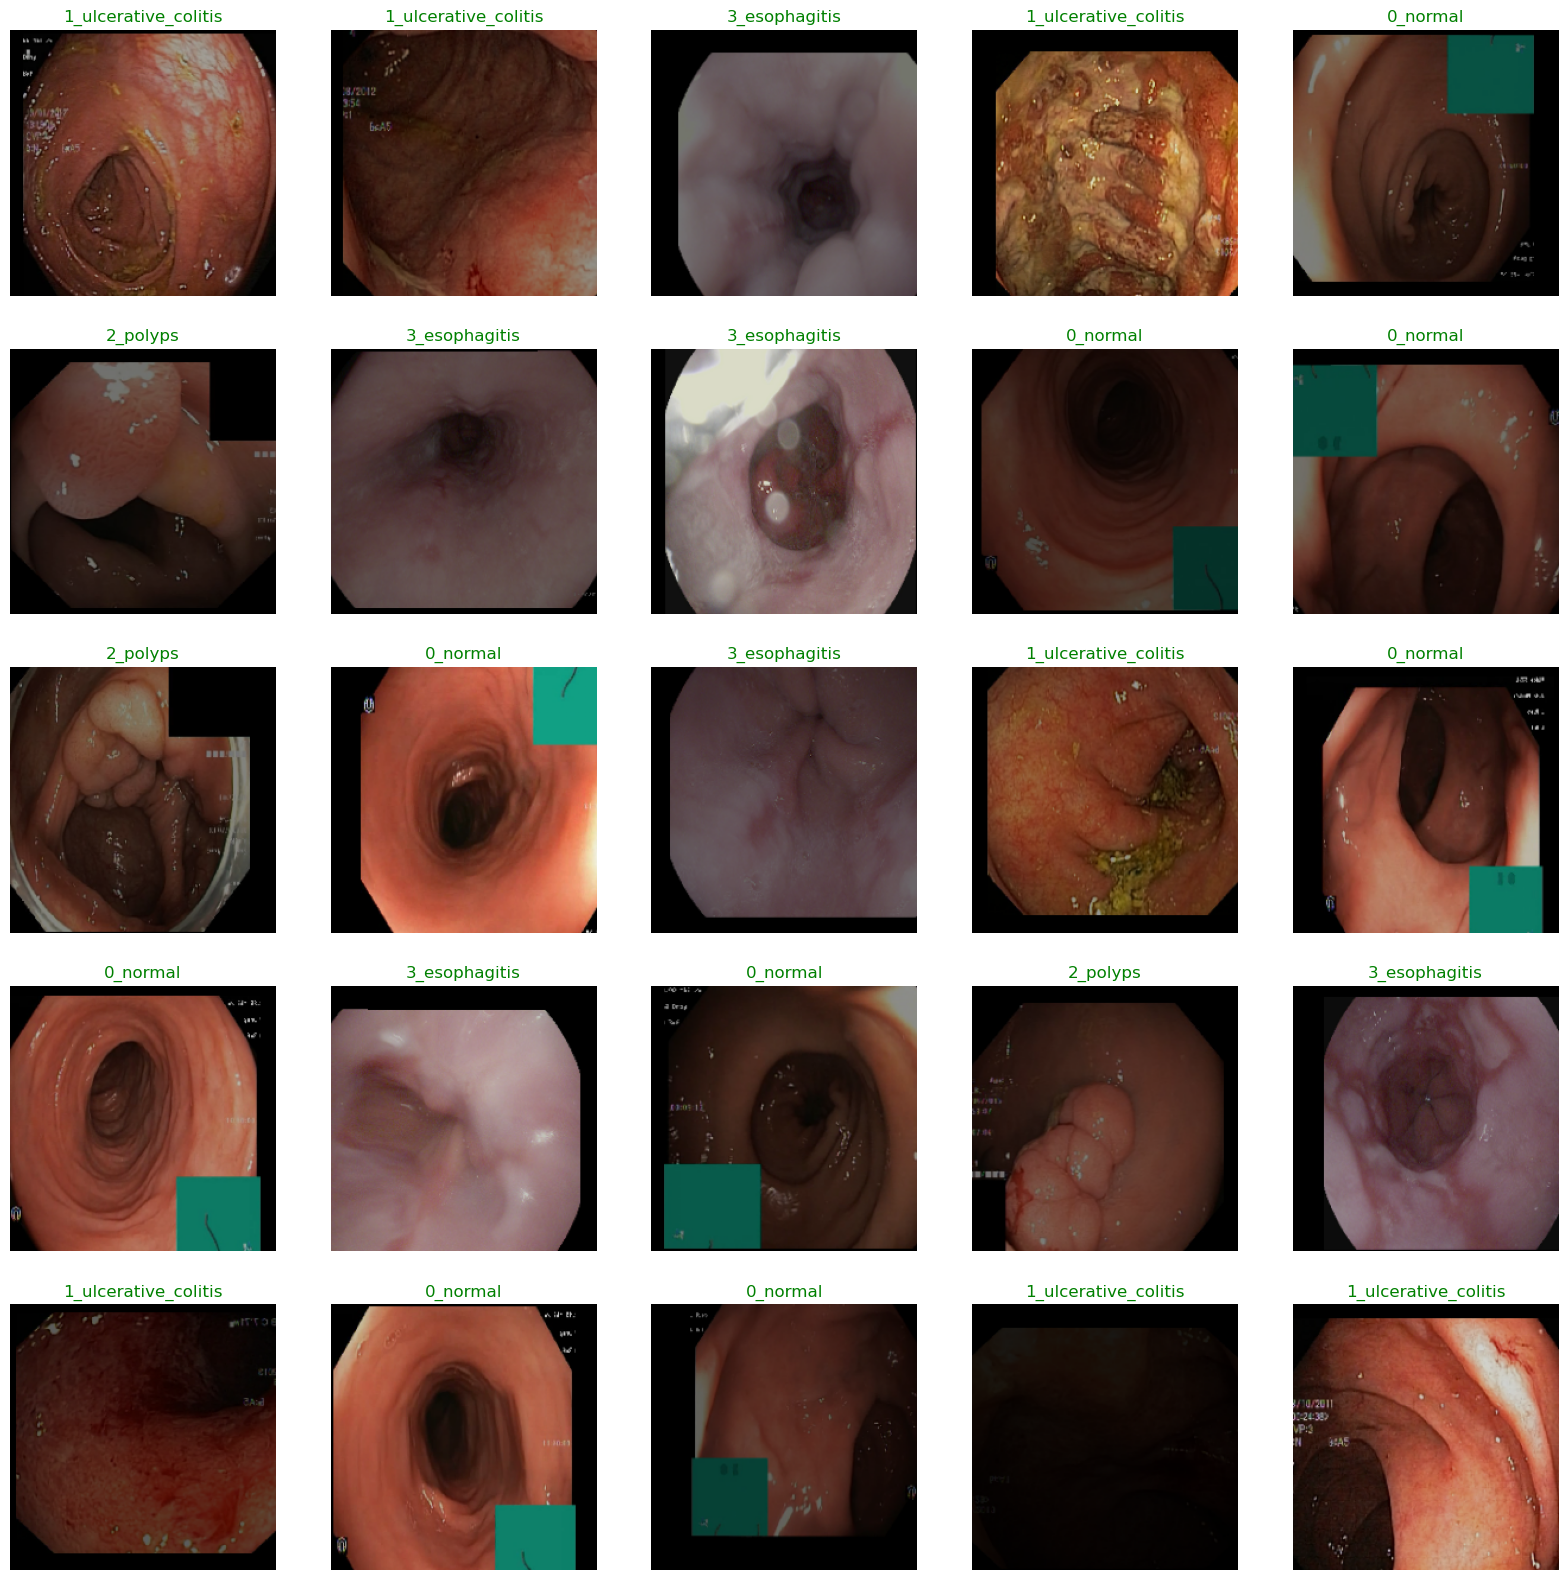

In [10]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i]       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='Green', fontsize=12)
        plt.axis('off')
    plt.show()
    
show_image_samples(train_generator)

In [11]:
input_shape = [224,224,3]
#model_input_tensor = tf.convert_to_tensor(model_input, np.int32)

model_input = Input(shape=input_shape)
model_input_tensor = tf.convert_to_tensor(model_input, np.float32)
model_input_tensor 

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'tf.convert_to_tensor')>

In [12]:
#MobileNetV2
builder_b = DCNN_B + '_builder'

#TRANSFER LEARNING
def builder_b(model_input):
    builder_b = trainable_model_b(weights='imagenet', 
                                    include_top=False, 
                                    input_tensor = model_input)

#PARTIAL LAYER FREEZING
    for layer in builder_b.layers:
        layer.trainable = False
        
    for layer in builder_b.layers:
        layer._name = layer.name + '_' + DCNN_B
        
    for BatchNormalization in builder_b.layers:
        BatchNormalization.trainable = False
    
#LAYER COMPRESSION
    x = builder_b.layers[-39].output #Equivalent to four (4) CORE block deduction.
    
#AUXILIARY FUSING LAYER (AuxFL)
    x = Conv2D(192, 8, padding='valid', activation='selu', kernel_initializer='lecun_normal')(x)
    x = AveragePooling2D(1, 1)(x)
    x = AlphaDropout(0.2)(x)

    dcnn_b = Model(inputs=builder_b.input, outputs=x, name=DCNN_B)
    return dcnn_b

#INITIALIZE THE MODEL
dcnn_b = builder_b(model_input)

#PLOT THE MODEL STRUCTURE
print("PLEASE CHECK THE ENTIRE MODEL UP TO THE END")
dcnn_b.summary()
print(" successfully built!")

PLEASE CHECK THE ENTIRE MODEL UP TO THE END
Model: "DCNN_B"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1_DCNN_B (InputLayer)     [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_DCNN_B (Conv2D)           (None, 112, 112, 32) 864         input_1_DCNN_B[0][0]             
__________________________________________________________________________________________________
bn_Conv1_DCNN_B (BatchNormaliza (None, 112, 112, 32) 128         Conv1_DCNN_B[0][0]               
__________________________________________________________________________________________________
Conv1_relu_DCNN_B (ReLU)        (None, 112, 112, 32) 0           bn_Conv1_DCNN_B[0][0]            
_________________________________________________

In [13]:
#ResNet50V2
builder_c = DCNN_C + '_builder'

#TRANSFER LEARNING
def builder_c(model_input):
    builder_c = trainable_model_c(weights='imagenet', 
                                    include_top=False, 
                                    input_tensor = model_input)

#PARTIAL LAYER FREEZING
    for layer in builder_c.layers:
        layer.trainable = False
        
    for layer in builder_c.layers:
        layer._name = layer.name + '_' + DCNN_C
        
    for BatchNormalization in builder_c.layers:
        BatchNormalization.trainable = False
    
#LAYER COMPRESSION
    x = builder_c.layers[-117].output #Equivalent to two (2) CORE block deduction.
    #x = builder_c.layers[-32].output
    
 #AUXILIARY FUSING LAYER (AuxFL)   
    x = Conv2D(192, 6, padding='valid', activation='selu', kernel_initializer='lecun_normal')(x)
    x = AveragePooling2D(3, 3)(x)
    
    x = AlphaDropout(0.2)(x)
    #x = Conv2D(192, 1, padding='valid', activation='selu', kernel_initializer='lecun_normal')(x)
    #x = AveragePooling2D(1, 1)(x)
    #x = AlphaDropout(0.2)(x)

    dcnn_c = Model(inputs=builder_c.input, outputs=x, name=DCNN_C)
    return dcnn_c

#INITIALIZE THE MODEL
dcnn_c = builder_c(model_input)

#PLOT THE MODEL STRUCTURE
print("PLEASE CHECK THE ENTIRE MODEL UP TO THE END")
dcnn_c.summary()
print("successfully built!")

PLEASE CHECK THE ENTIRE MODEL UP TO THE END
Model: "DCNN_C"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1_DCNN_B_DCNN_C (InputLay [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad_DCNN_C (ZeroPadding2D (None, 230, 230, 3)  0           input_1_DCNN_B_DCNN_C[0][0]      
__________________________________________________________________________________________________
conv1_conv_DCNN_C (Conv2D)      (None, 112, 112, 64) 9472        conv1_pad_DCNN_C[0][0]           
__________________________________________________________________________________________________
pool1_pad_DCNN_C (ZeroPadding2D (None, 114, 114, 64) 0           conv1_conv_DCNN_C[0][0]          
_________________________________________________

In [14]:


#RE-INITIALIZE FOR FUSION
#dcnn_a = builder_a(model_input)
dcnn_b = builder_b(model_input)
dcnn_c = builder_c(model_input)

print("Accomplished Pre-training and ready for fusion")



Accomplished Pre-training and ready for fusion


In [15]:
class Spatial_Attention_Block(layers.Layer):
    def __init__(self,out_channel,kernel,**kwargs):
        super(Spatial_Attention_Block,self).__init__(**kwargs)
        
        self.out_channel=out_channel
        self.kernel=kernel
        #1,16,32     1,3,3
        self.conv_1=Conv2D(filters=self.out_channel[0],kernel_size=self.kernel[0])
        self.conv_2=Conv2D(filters=self.out_channel[1],kernel_size=self.kernel[1],padding='same')
        self.conv_3=Conv2D(filters=self.out_channel[2],kernel_size=self.kernel[2],padding='same')
        
    def call(self,images):
        x=tf.nn.relu(self.conv_1(images))
        #print("For 1st Attention conv-1 : ",x.shape)
        x=tf.nn.relu(self.conv_2(x))
        #print("For 1st Attention conv-2 : ",x.shape)
        x=tf.nn.relu(self.conv_3(x))
        #print("For 1st Attention conv-3 : ",x.shape)
        
        return (x+images)
    
    def get_config(self):
        config = super(Spatial_Attention_Block,self).get_config()
        config.update({
            "out_channel": self.out_channel,
            "kernel": self.kernel,
             })
        return config
    
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [16]:
def SAM_Model(model_input):
    
 
    x = Conv2D(filters=32,kernel_size=(3,3),activation='relu')(model_input)
    x = Spatial_Attention_Block(out_channel=[1,16,32],kernel=[1,3,3])(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
    x = Spatial_Attention_Block(out_channel=[1,32,64],kernel=[1,3,3])(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
    x = Spatial_Attention_Block(out_channel=[1,32,64],kernel=[1,3,3])(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(filters=128,kernel_size=(3,3),activation='relu')(x)
    x = Spatial_Attention_Block(out_channel=[1,64,128],kernel=[1,3,3])(x)
    x = Conv2D(192, 2, padding='valid', activation='relu', kernel_initializer='lecun_normal')(x)
    x = AveragePooling2D(3, 3)(x)
    x = AlphaDropout(0.2)(x)

    output_layer = x

    SAM_model = Model(model_input, outputs=output_layer)

    return SAM_model

sam = SAM_Model(model_input)


sam.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1_DCNN_B_DCNN_C_DCNN_B [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
spatial__attention__block (S (None, 222, 222, 32)      4833      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
spatial__attention__block_1  (None, 109, 109, 64)      18881 

In [19]:
#FUSE THE MODELS INTO A SINGLE PIPELINE
models = [sam,dcnn_b,
          dcnn_c]

print("Fusion success!")
print("Ready to connect with its ending layers!")
models

Fusion success!
Ready to connect with its ending layers!


In [20]:
outputs = [m.output for m in models]
#outputs
x_sum = tf.add(sam.output, dcnn_b.output)
x_sum = tf.add(x_sum,dcnn_c.output)
x_sum

<KerasTensor: shape=(None, 7, 7, 192) dtype=float32 (created by layer 'tf.math.add_3')>

In [21]:
test = mfurecnn_builder(models, model_input)
test._name = "Test"
model_name = test._name

print()
print()
print("PLEASE CHECK THE MODEL UP TO THE END")
print()
print()
print()

test.summary()
print("The", model_name, "is now complete and ready for compilation and training!")

NameError: name 'mfurecnn_builder' is not defined

In [22]:
#Build the Fusion Residual Block (FuRB) fusion hosse
def mfurecnn_builder(models, model_input):
    outputs = [m.output for m in models]
    
#INITIAL FUSION LAYER
    y = Add(name='InitialFusionLayer')(outputs)
    
#FuRB LAYER
    y_bn1 = BatchNormalization()(y)
    y_selu1 = tf.keras.activations.selu(y_bn1)
    y_conv1 = Conv2D(192, 1, kernel_initializer='lecun_normal')(y_selu1)
    #y_sam1 = Spatial_Attention_Block(out_channel=[1,96,192],kernel=[1,1,1])(y_conv1)
    y_bn2 = BatchNormalization()(y_conv1)
    y_selu2 = tf.keras.activations.selu(y_bn2)
    y_conv2 = Conv2D(192, 1, kernel_initializer='lecun_normal')(y_selu2)
    #y_sam2 = Spatial_Attention_Block(out_channel=[1,96,192],kernel=[1,1,1])(y_conv2)
    
    y_merge = Add(name='FuRB')([y, y_conv2])
    
#FINE-TUNING LAYER
    y = GlobalAveragePooling2D()(y_merge)
    y = Dense(192,activation='relu')(y)
    y = AlphaDropout(0.5)(y)
    prediction = Dense(num_classes,activation='softmax', name='Softmax_Classifier' + architecture)(y)
    model = Model(model_input, prediction, name=architecture)
    tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)
    return model

#Istantitate the model and report the summary
mfurecnn = mfurecnn_builder(models, model_input)
mfurecnn._name = "MFuReCNN"
model_name = mfurecnn._name

print()
print()
print("PLEASE CHECK THE MODEL UP TO THE END")
print()
print()
print()

mfurecnn.summary()
print("The", model_name, "is now complete and ready for compilation and training!")

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


PLEASE CHECK THE MODEL UP TO THE END



Model: "MFuReCNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1_DCNN_B_DCNN_C_DCNN_B_DC [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_DCNN_B (Conv2D)           (None, 112, 112, 32) 864         input_1_DCNN_B_DCNN_C_DCNN_B_DCNN
__________________________________________________________________________________________________
bn_Conv1_DCNN_B (BatchNormaliza (None, 112, 112, 32) 128         Conv1_DCNN_B[0][0]               
_____________________________________________________________________________

In [24]:
filepath = '/saved_models/model-ep{epoch:03d}-val_loss{val_loss:.3f}-val_acc{val_accuracy:.3f}.h5'
checkpoint = ModelCheckpoint( filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min')

In [25]:
#MODEL COMPILATION WITH HYPER-PARAMETERS, LOSS FUNCTIONS AND TRAINING!
mfurecnn.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2,
                              verbose=1, mode='max')

callbacks = [reduce_lr]

print('-'*50)
print('Successfully compiled the', model_name, 'model!')
print('You may now proceed in training the', model_name, 'model!')
print('-'*50)
callbacks

--------------------------------------------------
Successfully compiled the MFuReCNN model!
You may now proceed in training the MFuReCNN model!
--------------------------------------------------


In [26]:
# MODEL TRAINING

#Set training time
start_time = time.time()
print('*'*50)
print("Training", model_name)
print('*'*50)
print('-'*50)
print("Training time is being measured")
print('-'*50)
history = mfurecnn.fit(train_generator, steps_per_epoch=nb_train_samples // batch_size,
                                  epochs=epochs, validation_data=validation_generator,
                                  callbacks=callbacks, 
                                  validation_steps=nb_validation_samples // batch_size, verbose=1)

print()
print("MODEL SERIALIZING WAIT FOR A MOMENT...")
elapsed_time = time.time() - start_time
train_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print()
print()
print(train_time, 'train_time')
print()
print(elapsed_time, 'Seconds')
print()
print()
print("MODEL SERIALIZATION DONE!")

**************************************************
Training MFuReCNN
**************************************************
--------------------------------------------------
Training time is being measured
--------------------------------------------------
Epoch 1/25


KeyboardInterrupt: 

In [27]:
from matplotlib import pyplot as plt

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [30]:
loaded_model = load_model('model/' + architecture + '/' + architecture + '.h5',custom_objects={'Spatial_Attention_Block':Spatial_Attention_Block})
print("The model is successfully loaded!")

The model is successfully loaded!


In [31]:
train_labels = train_generator.classes
validation_labels = validation_generator.classes
test_labels = test_generator.classes

In [32]:
loaded_model.summary()

Model: "MFuReCNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1_DCNN_B_DCNN_C_DCNN_B_DC [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_DCNN_B (Conv2D)           (None, 112, 112, 32) 864         input_1_DCNN_B_DCNN_C_DCNN_B_DCNN
__________________________________________________________________________________________________
bn_Conv1_DCNN_B (BatchNormaliza (None, 112, 112, 32) 128         Conv1_DCNN_B[0][0]               
__________________________________________________________________________________________________
Conv1_relu_DCNN_B (ReLU)        (None, 112, 112, 32) 0           bn_Conv1_DCNN_B[0][0]            
___________________________________________________________________________________________

C:\Users\Shivam\AppData\Local\Temp\ipykernel_28836\1048403385.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[colors.astype(np.int)])
C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be

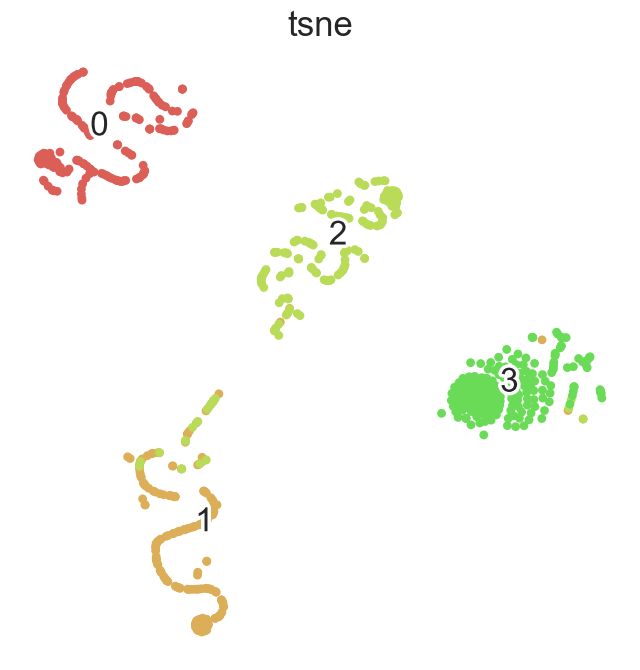

In [36]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold._t_sne import (_joint_probabilities,
                                    _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
#






 


pred_batch = loaded_model.predict(test_generator, nb_train_samples/batch_size, workers=1)

proj = TSNE(random_state=RS).fit_transform(pred_batch)










def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts



scatter(proj,test_labels)
plt.title('tsne',fontsize = 25)
plt.savefig('TSNE.eps', dpi=60)


In [28]:
y_pred = loaded_model.predict(train_generator, nb_train_samples/batch_size, workers=1)

accuracy = accuracy_score(train_labels, y_pred.argmax(axis=-1))
print('The val accuracy of the ' + loaded_model._name + ' is: ', accuracy)

#evaluate mean squared error
mse = mean_squared_error(train_labels, y_pred.argmax(axis=-1))
print('The val MSE of the ' + loaded_model._name + ' is: ', mse)

#evaluate mean squared log error
msle = mean_squared_log_error(train_labels, y_pred.argmax(axis=-1))  
print('The val MSLE of the ' + loaded_model._name +  ' is: ', msle)

The val accuracy of the MFuReCNN is:  0.2655420181193377
The val MSE of the MFuReCNN is:  2.4607935020306155
The val MSLE of the MFuReCNN is:  0.5305011250269948


In [33]:
y_pred = mfurecnn.predict(test_generator, 
                                 nb_test_samples/batch_size, workers=1)

accuracy = accuracy_score(test_labels, y_pred.argmax(axis=-1))
print('The val accuracy of the ' + mfurecnn._name + ' is: ', accuracy)

#evaluate mean squared error
mse = mean_squared_error(test_labels, y_pred.argmax(axis=-1))
print('The val MSE of the ' + mfurecnn._name + ' is: ', mse)

#evaluate mean squared log error
msle = mean_squared_log_error(test_labels, y_pred.argmax(axis=-1))  
print('The val MSLE of the ' + mfurecnn._name +  ' is: ', msle)

KeyboardInterrupt: 

In [35]:
y_pred = loaded_model.predict(validation_generator, 
                                 nb_test_samples/batch_size, workers=1)

accuracy = accuracy_score(validation_labels, y_pred.argmax(axis=-1))
print('The val accuracy of the ' + loaded_model._name + ' is: ', accuracy)

#evaluate mean squared error
mse = mean_squared_error(validation_labels, y_pred.argmax(axis=-1))
print('The val MSE of the ' + loaded_model._name + ' is: ', mse)

#evaluate mean squared log error
msle = mean_squared_log_error(validation_labels, y_pred.argmax(axis=-1))  
print('The val MSLE of the ' + loaded_model._name +  ' is: ', msle)

The val accuracy of the MFuReCNN is:  0.9645
The val MSE of the MFuReCNN is:  0.0505
The val MSLE of the MFuReCNN is:  0.00817970466734207


In [34]:
#evaluate validation accuracy
y_pred = loaded_model.predict(test_generator, 
                                 nb_test_samples/batch_size, workers=1)

accuracy = accuracy_score(test_labels, y_pred.argmax(axis=-1))
print('The val accuracy of the ' + loaded_model._name + ' is: ', accuracy)

#evaluate mean squared error
mse = mean_squared_error(test_labels, y_pred.argmax(axis=-1))
print('The val MSE of the ' + loaded_model._name + ' is: ', mse)

#evaluate mean squared log error
msle = mean_squared_log_error(test_labels, y_pred.argmax(axis=-1))  
print('The val MSLE of the ' + loaded_model._name +  ' is: ', msle)

The val accuracy of the MFuReCNN is:  0.96625
The val MSE of the MFuReCNN is:  0.045
The val MSLE of the MFuReCNN is:  0.006427603747426919


In [26]:
#Custom save function
def save_h(file, history):
    with open(file + '/' + architecture + '/' + architecture + '.history', 'wb') as file_pi:
        pickle.dump(history, file_pi)
    print("history saved")

In [27]:
#SAVE AFTER TRAINING COMPLETES
mfurecnn.save('model/' + architecture + '/' + architecture + '.h5')

# #SAVE THE HISTORY FOR EVALUATION
#save_h('model/', history.history)

#Prompt
print("-"*50)
print()
print("The Model weights and history of the", model_name, "successfully trained and saved!")
print()
print("-"*50)

C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


--------------------------------------------------

The Model weights and history of the MFuReCNN successfully trained and saved!

--------------------------------------------------


In [26]:
loaded_model = load_model('model/' + architecture + '/' + architecture + '.h5',custom_objects={'Spatial_Attention_Block':Spatial_Attention_Block})
print("The model is successfully loaded!")
loaded_model.summary()

The model is successfully loaded!
Model: "MFuReCNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1_DCNN_B_DCNN_C_DCNN_B_DC [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_DCNN_B (Conv2D)           (None, 112, 112, 32) 864         input_1_DCNN_B_DCNN_C_DCNN_B_DCNN
__________________________________________________________________________________________________
bn_Conv1_DCNN_B (BatchNormaliza (None, 112, 112, 32) 128         Conv1_DCNN_B[0][0]               
__________________________________________________________________________________________________
Conv1_relu_DCNN_B (ReLU)        (None, 112, 112, 32) 0           bn_Conv1_DCNN_B[0][0]            
_________________________________________________________

In [85]:
mfurecnn.summary()

Model: "MFuReCNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5_DCNN_B_DCNN_C_DCNN_B_DC [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_DCNN_B (Conv2D)           (None, 112, 112, 32) 864         input_5_DCNN_B_DCNN_C_DCNN_B_DCNN
__________________________________________________________________________________________________
bn_Conv1_DCNN_B (BatchNormaliza (None, 112, 112, 32) 128         Conv1_DCNN_B[0][0]               
__________________________________________________________________________________________________
Conv1_relu_DCNN_B (ReLU)        (None, 112, 112, 32) 0           bn_Conv1_DCNN_B[0][0]            
___________________________________________________________________________________________

In [60]:
def visualize_class_activation_map(model, img_path, output_path, thr=0.0):
  original_img = cv2.imread(img_path, 1)
  original_img = cv2.resize(original_img, (224, 224))
  width, height, _ = original_img.shape

  img = tf.expand_dims(original_img,axis=0)

  try:
    [conv_outputs] = model([img])[0]
  except:
    conv_outputs = (model.get_layer('FuRB').output)
    get_output = K.function([model.layers[0].input], [conv_outputs])
    [conv_outputs] = get_output([img])
    conv_outputs = conv_outputs[0, :, :, :]

  #Create the class activation map.
  cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[0:2])
  
  for i in range(conv_outputs.shape[2]):
    cam += 1.0 * conv_outputs[:, :, i]

  cam /= np.max(cam)
  try:
    cam = cam.numpy()
  except:
    pass
  cam = cv2.resize(cam, (height, width))
  heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
  heatmap[np.where(cam < thr)] = 0
  cam_img = heatmap*0.5 + original_img

  cam_img = cv2.resize(cam_img, (224, 224))
  cv2.imwrite(output_path, cam_img)

  plt.figure(figsize=(8, 8))
  im = Image.open(img_path)
  im.resize((224, 224))
  plt.imshow(np.array(im))
  plt.show()


  plt.figure(figsize=(8, 8))
  im = Image.open(output_path)
  im.resize((224, 224))
  plt.imshow(np.array(im))
  plt.show()
  return cam

In [61]:
from keras import backend as K
from PIL import Image

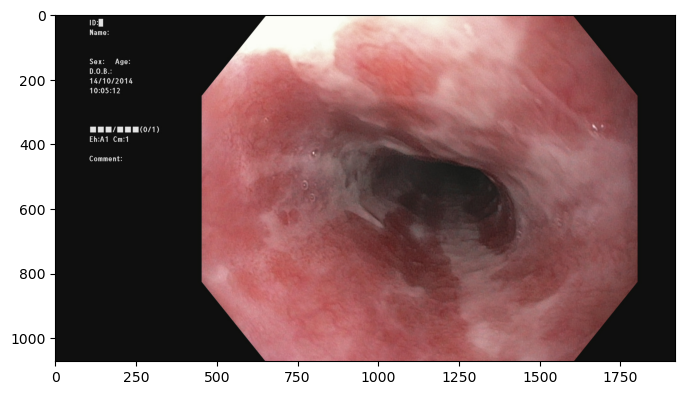

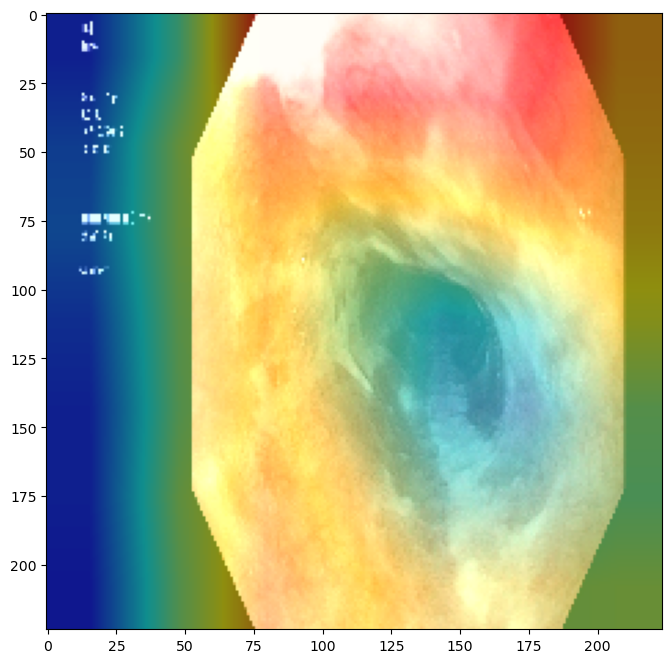

In [81]:
visualize_class_activation_map(loaded_model, './archive(1)/test/images/3_esophagitis/test_esophagitis_ (31).jpg', './activation_maps/pic_cam.png',thr=-10);

In [38]:
Y_pred = np.argmax(loaded_model.predict_generator(test_generator), axis=1)
Y_test = test_generator.classes

C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [49]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [56]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

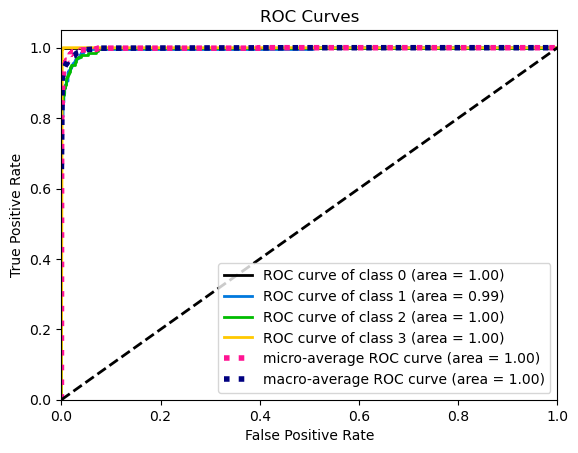

In [58]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
Y_probas  = loaded_model.predict(test_generator)
skplt.metrics.plot_roc_curve(Y_test, Y_probas)
plt.show()

In [42]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)





Confusion Matrix : 
 [[200   0   0   0]
 [  0 192   5   3]
 [  0  16 181   3]
 [  0   0   0 200]]


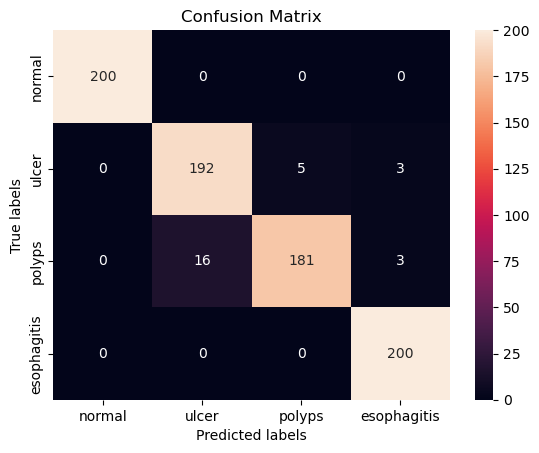

<Figure size 1000x700 with 0 Axes>

In [46]:

df_cm = pd.DataFrame(cm1, range(4), range(4))
ax= plt.subplot()
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True ,fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['normal', 'ulcer', 'polyps' , 'esophagitis']); ax.yaxis.set_ticklabels(['normal', 'ulcer', 'polyps' , 'esophagitis']);


In [ ]:
Y_

In [ ]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold._t_sne import (_joint_probabilities,
                                    _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})



proj = np.zeros(shape=(sample_count, 5, 5, 2048))  # Correct this

# Preprocess data
# Pass data through convolutional base
i = 0
for inputs_batch, labels_batch in test_generator:
    pred_batch = loaded_model.predict(inputs_batch)
    proj += TSNE(random_state=RS).fit_transform(pred_batch)



def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts



scatter(proj,y_test)
plt.title('tsne',fontsize = 25)
plt.savefig('TSNE.eps', dpi=60)

In [41]:
classes_= ['Normal', 'Ulcerative Colitis','Polyps','Esophagitis']

In [39]:
print(classification_report(test_labels, Y_pred, target_names=classes_))

                    precision    recall  f1-score   support

            Normal       1.00      1.00      1.00       200
Ulcerative Colitis       0.92      0.96      0.94       200
            Polyps       0.97      0.91      0.94       200
       Esophagitis       0.97      1.00      0.99       200

          accuracy                           0.97       800
         macro avg       0.97      0.97      0.97       800
      weighted avg       0.97      0.97      0.97       800



In [80]:
mfurecnn.summary()

Model: "MFuReCNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2_DCNN_A_DCNN_B_DCNN_C_DC [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_DCNN_B (Conv2D)           (None, 112, 112, 32) 864         input_2_DCNN_A_DCNN_B_DCNN_C_DCNN
__________________________________________________________________________________________________
bn_Conv1_DCNN_B (BatchNormaliza (None, 112, 112, 32) 128         Conv1_DCNN_B[0][0]               
__________________________________________________________________________________________________
Conv1_relu_DCNN_B (ReLU)        (None, 112, 112, 32) 0           bn_Conv1_DCNN_B[0][0]            
___________________________________________________________________________________________

In [75]:
model2 = Model(mfurecnn.input,mfurecnn.layers[-3].output)
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1_DCNN_A_DCNN_A_DCNN_B_DC [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_DCNN_B (Conv2D)           (None, 112, 112, 32) 864         input_1_DCNN_A_DCNN_A_DCNN_B_DCNN
__________________________________________________________________________________________________
bn_Conv1_DCNN_B (BatchNormaliza (None, 112, 112, 32) 128         Conv1_DCNN_B[0][0]               
__________________________________________________________________________________________________
Conv1_relu_DCNN_B (ReLU)        (None, 112, 112, 32) 0           bn_Conv1_DCNN_B[0][0]            
____________________________________________________________________________________________

In [76]:
features = model2.predict(test_generator)

In [77]:
features[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 8.841074  , 8.779323  , 8.045232  , 0.        ,
       5.7187953 , 6.426877  , 0.9348198 , 0.        , 0.        ,
       2.0598903 , 0.        , 0.        , 6.74839   , 0.50977683,
       0.        , 6.2301617 , 0.61694235, 0.        , 5.397277  ,
       0.        , 0.        , 0.        , 4.5275598 , 0.11151507,
       0.        , 0.        , 0.        , 0.        , 4.6558223 ,
       0.        , 0.        , 0.        , 0.04041879, 0.        ,
       0.        , 0.        , 4.4632716 , 6.5464706 , 0.        ,
       1.8551728 , 1.8059816 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 6.7453203 , 0.48209918,
       0.40582433, 0.        , 0.        , 0.        , 0.        ,
       1.4101411 , 0.        , 0.        , 3.7863193 , 0.        ,
       0.7849589 , 4.1622314 , 1.429071  , 1.4879858 , 0.        ,
       0.        , 0.        , 8.311157  , 0.        , 0.     

In [84]:
features[0]

array([-0.7979261 , -0.98859906, -1.9504694 , -0.80282205, -3.545468  ,
       -2.0169015 ,  3.9062774 , -0.843164  , -2.5950541 , -1.6419463 ,
       -0.00856802, -1.9979461 , -2.1945443 , -0.82214665, -4.0077543 ,
       -2.6561048 , -2.480958  , -2.3765461 , -0.7376342 , -4.2239943 ,
       -1.7233787 ,  1.425642  , -4.8112307 ,  0.8316413 , -0.9927071 ,
       -0.24770343, -3.856961  , -2.4622605 , -1.8148203 , -3.6614997 ,
       -0.34773165,  0.53759205, -1.1436411 , -1.1034812 , -1.9102914 ,
       -1.8941832 , -1.9553246 , -3.638818  , -1.8414155 , -2.9665585 ,
       -0.7609347 , -2.0140197 , -2.2800763 , -2.2561057 , -3.2296853 ,
       -2.9427986 , -0.73025   , -0.92821705, -1.477445  , -5.1265693 ,
       -3.5309186 , -0.91446763, -3.5551124 , -2.6537468 , -1.3580287 ,
       -1.6158031 , -3.178397  ,  2.070048  , -1.5818142 , -0.778715  ,
       -1.5177479 ,  2.1297843 , -4.793038  , -2.5078874 ,  2.0309439 ,
       -3.6951182 , -4.1315603 , -0.2277101 , -1.1971083 , -2.47

In [78]:

df =pd.DataFrame(features)

In [79]:
df
df = pd.concat([df, pd.DataFrame(test_labels)], axis=1)

In [80]:
df

0    1         2    3         4          5         6         7    \
0    0.000000  0.0  0.000000  0.0  0.000000   0.000000  8.841074  8.779323   
1    0.000000  0.0  0.000000  0.0  0.000000   0.000000  8.567171  9.827031   
2    0.000000  0.0  0.000000  0.0  4.042038   0.000000  9.122978  5.242946   
3    0.000000  0.0  0.016202  0.0  0.000000   0.288427  4.755886  6.014605   
4    0.000000  0.0  0.013523  0.0  0.279288   0.000000  7.425168  5.691486   
..        ...  ...       ...  ...       ...        ...       ...       ...   
795  1.109481  0.0  0.000000  0.0  0.000000  12.056849  0.000000  4.899775   
796  2.877496  0.0  0.000000  0.0  0.000000  11.936029  0.000000  4.414040   
797  0.000000  0.0  0.000000  0.0  0.000000  13.253244  0.000000  6.982604   
798  0.953296  0.0  0.000000  0.0  1.558069  12.758462  0.000000  3.237214   
799  1.592101  0.0  0.000000  0.0  0.000000  11.608016  0.000000  3.750883   

          8    9    ...       183  184        185       186       187  \
0    8.045232  0.0  ...  1.268786  0.0   4.612845  0.609681  1.329977   
1    7.890180  0.0  ...  1.375362  0.0   3.199298  0.911753  1.730724   
2    5.610700  0.0  ...  6.550072  0.0   0.000000  0.000000  0.000000   
3    5.944191  0.0  ...  1.794020  0.0   4.644456  0.465526  0.030457   
4    8.428021  0.0  ...  3.240373  0.0   3.467404  0.000000  0.309020   
..        ...  ...  ...       ...  ...        ...       ...       ...   
795  0.000000  0.0  ...  2.433009  0.0   6.021011  2.664404  5.691994   
796  0.623940  0.0  ...  0.000000  0.0  10.595097  1.628381  6.669767   
797  0.000000  0.0  ...  0.699191  0.0   5.478032  3.102811  7.118927   
798  0.000000  0.0  ...  2.839673  0.0   5.169103  2.889734  4.331031   
799  0.000000  0.0  ...  0.000000  0.0   7.903423  1.057774  6.710855   

          188       189  190       191  0    
0    5.103787  0.000000  0.0  2.383956    0  
1    4.959893  0.000000  0.0  3.377371    0  
2    1.635096  0.735630  0.0  2.068197    0  
3    4.806777  0.000000  0.0  1.820493    0  
4    3.937348  0.000000  0.0  3.339114    0  
..        ...       ...  ...       ...  ...  
795  2.481285  8.747176  0.0  0.000000    3  
796  4.716675  4.135958  0.0  0.000000    3  
797  1.303297  8.211806  0.0  0.000000    3  
798  0.228026  9.340938  0.0  0.000000    3  
799  3.409914  5.091190  0.0  0.000000    3  

[800 rows x 193 columns]

In [81]:
df.columns = [*df.columns[:-1], 'Labels']

In [82]:
df

0    1         2    3         4          5         6         7  \
0    0.000000  0.0  0.000000  0.0  0.000000   0.000000  8.841074  8.779323   
1    0.000000  0.0  0.000000  0.0  0.000000   0.000000  8.567171  9.827031   
2    0.000000  0.0  0.000000  0.0  4.042038   0.000000  9.122978  5.242946   
3    0.000000  0.0  0.016202  0.0  0.000000   0.288427  4.755886  6.014605   
4    0.000000  0.0  0.013523  0.0  0.279288   0.000000  7.425168  5.691486   
..        ...  ...       ...  ...       ...        ...       ...       ...   
795  1.109481  0.0  0.000000  0.0  0.000000  12.056849  0.000000  4.899775   
796  2.877496  0.0  0.000000  0.0  0.000000  11.936029  0.000000  4.414040   
797  0.000000  0.0  0.000000  0.0  0.000000  13.253244  0.000000  6.982604   
798  0.953296  0.0  0.000000  0.0  1.558069  12.758462  0.000000  3.237214   
799  1.592101  0.0  0.000000  0.0  0.000000  11.608016  0.000000  3.750883   

            8    9  ...       183  184        185       186       187  \
0    8.045232  0.0  ...  1.268786  0.0   4.612845  0.609681  1.329977   
1    7.890180  0.0  ...  1.375362  0.0   3.199298  0.911753  1.730724   
2    5.610700  0.0  ...  6.550072  0.0   0.000000  0.000000  0.000000   
3    5.944191  0.0  ...  1.794020  0.0   4.644456  0.465526  0.030457   
4    8.428021  0.0  ...  3.240373  0.0   3.467404  0.000000  0.309020   
..        ...  ...  ...       ...  ...        ...       ...       ...   
795  0.000000  0.0  ...  2.433009  0.0   6.021011  2.664404  5.691994   
796  0.623940  0.0  ...  0.000000  0.0  10.595097  1.628381  6.669767   
797  0.000000  0.0  ...  0.699191  0.0   5.478032  3.102811  7.118927   
798  0.000000  0.0  ...  2.839673  0.0   5.169103  2.889734  4.331031   
799  0.000000  0.0  ...  0.000000  0.0   7.903423  1.057774  6.710855   

          188       189  190       191  Labels  
0    5.103787  0.000000  0.0  2.383956       0  
1    4.959893  0.000000  0.0  3.377371       0  
2    1.635096  0.735630  0.0  2.068197       0  
3    4.806777  0.000000  0.0  1.820493       0  
4    3.937348  0.000000  0.0  3.339114       0  
..        ...       ...  ...       ...     ...  
795  2.481285  8.747176  0.0  0.000000       3  
796  4.716675  4.135958  0.0  0.000000       3  
797  1.303297  8.211806  0.0  0.000000       3  
798  0.228026  9.340938  0.0  0.000000       3  
799  3.409914  5.091190  0.0  0.000000       3  

[800 rows x 193 columns]

In [83]:
df.to_csv('WCE_FusionSAM_extracted_features_192.csv')